In [3]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHREYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHREYAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Load the datase
df = pd.read_csv(r"C:\Users\SHREYAS\Downloads\spam.csv",encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df=df[["v1","v2"]]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [10]:
df['label'] = df['label'].map({'ham':0, 'spam':1})


In [11]:
# Preprocessing
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [ps.stem(w) for w in words if w.isalnum() and w not in stop_words]
    return ' '.join(words)

df['processed_message'] = df['message'].apply(preprocess_text)

In [12]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to reduce training time
X = vectorizer.fit_transform(df['processed_message'])
y = df['label']

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Before:\n", y.value_counts())
print("\nAfter:\n", pd.Series(y_res).value_counts())


Before:
 label
0    4825
1     747
Name: count, dtype: int64

After:
 label
0    4825
1    4825
Name: count, dtype: int64


In [14]:
# Splittin the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_test.shape

(1115, 5000)

In [16]:
y_test.shape

(1115,)

In [17]:
# Training the model with Logistic Regression
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.1f}%")

Accuracy: 94.5%


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["ham", "spam"]))


              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       965
        spam       0.96      0.62      0.75       150

    accuracy                           0.95      1115
   macro avg       0.95      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



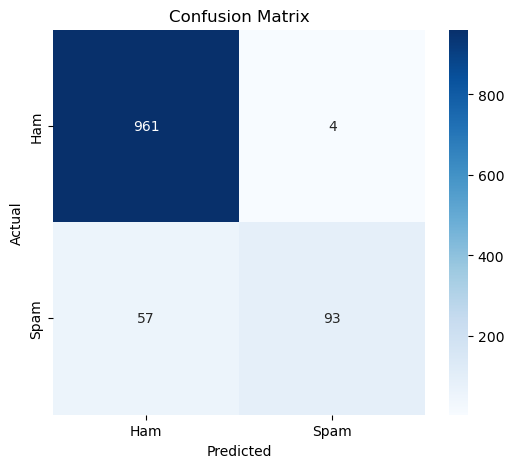

True Negatives: 961
False Positives: 4
False Negatives: 57
True Positives: 93

Classification Report:

              precision    recall  f1-score   support

         Ham       0.94      1.00      0.97       965
        Spam       0.96      0.62      0.75       150

    accuracy                           0.95      1115
   macro avg       0.95      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Predict
y_pred = model.predict(X_test)

# 2. Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


tn, fp, fn, tp = cm.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# 5. Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))


In [21]:
# Function to classify new message
def classify_message(message):
    processed = preprocess_text(message)
    vector = vectorizer.transform([processed])
    prediction = model.predict(vector)
    return "spam" if prediction[0] == 1 else "ham"

In [22]:
# Test on new Message
sample_spam = "Congrats! You've won a free iPhone. Click here to claim now!"
sample_ham = "Hey, let’s meet at the café at 6 PM today!"
print(f"Message: '{sample_spam}' is classified as: {classify_message(sample_spam)}")
print(f"Message: '{sample_ham}' is classified as: {classify_message(sample_ham)}")


Message: 'Congrats! You've won a free iPhone. Click here to claim now!' is classified as: spam
Message: 'Hey, let’s meet at the café at 6 PM today!' is classified as: ham


In [23]:
# Test On new Message
sample_spam = "Get your FREE ringtone of the week. Reply with TONE to 87131 to claim."
print(f"Message: '{sample_spam}' is classified as: {classify_message(sample_spam)}")



Message: 'Get your FREE ringtone of the week. Reply with TONE to 87131 to claim.' is classified as: spam
